# Welcome to the Datasurfer Tutorial

In this tutorial, you'll gain a rapid insight of Datasurfer, covering installation, building your initial data pool, searching for certain data, and visualizing it.

## Install Datasurfer

To initiate the installation of Datasurfer, execute the following command:

> pip install datasurfer


## Create Data Files
Before diving into data harnessing with Datasurfer, let's first create some data files in various formats.

In [1]:
import numpy as np
import pandas as pd
import json
from pathlib import Path

np.random.seed()

# Create a directory to store the data.
dir_data = Path('demo_data')
dir_data.mkdir(exist_ok=True)

# Create a csv file.
data1 = pd.DataFrame(np.random.rand(4, 5), columns=list('abcde'))
data1.to_csv(dir_data / 'data1.csv', index=False)

# Create an excel file
data2 = pd.DataFrame(np.random.rand(6, 4), columns=list('bcde'))
data2.to_excel(dir_data / 'data2.xlsx', index=False)

# Create a json file
data3 = pd.DataFrame(np.random.rand(5, 3), index=list('cdefg'))
json.dump(data3.to_dict(), open(dir_data / 'data3.json', 'w'),  indent=4)


## Data Pool

### Create a Data Pool Object by Path
We've now generated three files within the "demo_data" directory, each has different file types, varying data sizes, and unequal column names.

In the next step, We will create a data pool object to organize and contain these files.

In [2]:
import datasurfer as ds

# Create a DataSurfer object by giving the path of the data files
dp = ds.Data_Pool("demo_data")

# display all information of the data pool 
dp.describe(verbose=True)

Processing "demo_data/data4": 100%|██████████| 4/4 [00:00<00:00, 153.83it/s]


,Comment,Signal Count,Signal Length,Signal Size,Memory Usage,Interface,File Type,File Size,File Date,File Path
data1,None,5,4,20,0.0003,PANDAS_OBJECT,.csv,0.0004,2024-04-18 22:21:12.094121,c:\95_Programming\10_Data_Related\20_Projects\...
data2,None,4,6,24,0.0003,PANDAS_OBJECT,.xlsx,0.0058,2024-04-18 22:21:12.308239,c:\95_Programming\10_Data_Related\20_Projects\...
data3,None,5,3,15,0.0003,JSON_OBJECT,.json,0.0006,2024-04-18 22:21:12.319681,c:\95_Programming\10_Data_Related\20_Projects\...
data4,None,8,3,24,0.0003,PANDAS_OBJECT,.csv,0.0004,2024-04-15 21:58:04.522392,c:\95_Programming\10_Data_Related\20_Projects\...


### List Signal Names in the Pool
The data pool description provides details on the three files we've created, including signals, file types, sizes, and more. Using the following command, you can view all the signal names stored in the data pool:

In [3]:
# list all pool signals

dp.list_signals()

['Unnamed: 0', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

### Retrieve Single Signal from Pool

The Pool returns values from files within the pool, presenting them as a pandas DataFrame. To achieve data length alignment, empty spaces will be filled with 'NaN'.

In [4]:
# Obtain signal "c" from pool files
df = dp['c']

df

,data1,data2,data3,data4
0,0.184880,0.792278,0.968942,0.996721
1,0.683669,0.415172,0.939490,0.576359
2,0.193809,0.988417,0.483236,0.853079
3,0.470615,0.303216,NaN,NaN
4,NaN,0.278814,NaN,NaN
5,NaN,0.033725,NaN,NaN


### Retrieve multiple signals from Pool

The Pool can also return multiple signals at once. The signals can be specified by a list of signal names:


In [5]:
# Depresse warning messages
import warnings
warnings.filterwarnings("ignore")

# Return a DataFrame containing signals 'b' and 'c'; non-existent values will be filled with NaN.
df = dp[['b', 'c']]
df

,b,c
0,0.302863,0.184880
1,0.901391,0.683669
2,0.556435,0.193809
3,0.490187,0.470615
4,0.334605,0.792278
5,0.288508,0.415172
6,0.009023,0.988417
7,0.278961,0.303216
8,0.127840,0.278814
9,0.751997,0.033725


### Visualize data in the pool

You can also plot the data in the pool directly. The following code will satter pool signals:

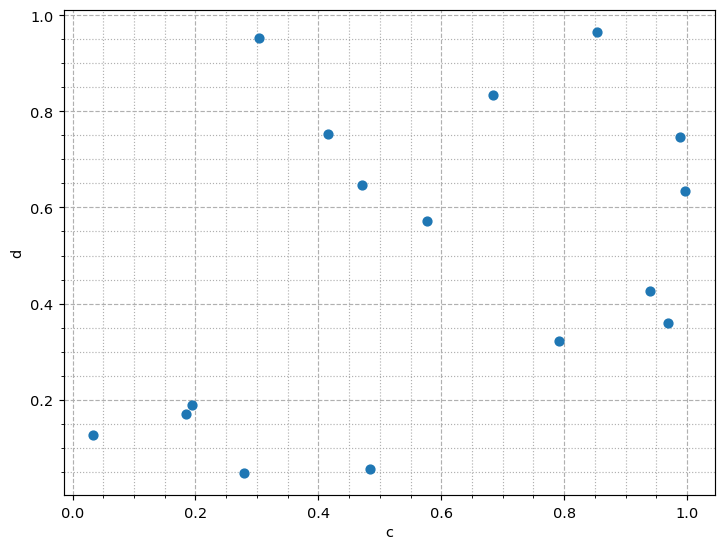

: 

In [6]:
# Scatter signal "c" and "d" and set the axis labels
dp.plot.scatter('c', 'd', setax=True);

Now that you've learned how to create a data pool and access its contents, in the next tutorial, you'll explore creating data objects for various data formats.